# 04 __Statistical Inference__

There is not only one way to address the problem of statistical inference. In fact,
there are two main approaches to statistical inference: the frequentist
and Bayesian approaches, Their diiferences are sublte but fundamental:

 + In the case of _frequentist apprach_, the main assumption is that there is
   a population, which can be represented by several parameters, from which
   we can obtain numerous random samples. The only way to derive the information
   aboyt these parameters is to take a sample of the population, to compute
   the parameters of the sample an to use statistical inference techqiniques to
   make probable propositions regarding population parameters.
   
 + The _Bayesian apprach_ is based on a considereation that data are fixed, not 
   the result of a repeatable sampling process, but parameters describing data
   can be described proabilisitically. To this end, Bayersian inference methods focus
   on reproducing parameter distributions that represent all the knowledge we 
   can extract from the sample and from prioir information about the problem.
   



The assumptions are related in the first case to a sampling process; and to a statistical
model in the second case. Correct inference requires these assumptions to be correct.
The fulfillment of this requirement is not part of the method, but it is the responsibility
of the data scientist.

## __Frequentist Approach to Statistical Inference__

If we adopt the frequentist approach, is to produce probable
propositions concerning population param-
eters from analysis of a sample. The most important classes of propositions are as
follows:

 + Propositions about _point estimates_. Apoint estimate is a particular value that
   best approximates some parameter of interest. For example, the mean or the
   variance of a sample.
   
 + Propositions about _confidence intervals_ or _set estimates_. A confidence interval
   is a range of values that best represents some parameter of interest.
   Propositions about the acceptance or rejection of a _hypothesis_.
   
  

In all these cases, the production of propositions is based on a simple assumptions:
we can estimate the probability that the result represented by the proposition
has been caused by chance. The estimation of this probability by sound method is one
of the main topics of statistics.

## __Measuring the Variability in Estimates__

Estimates produced by descriptive statistics are not equal to the truth but they are
better as more data become available. So, it makes sense to use them as central
elements of our propositions and to measure its variability with respect to the sample
size.

### __Point Estimates__

Let us suppose that we are interested in describing the daily number of
traffic accidents in the streets of Barcelona in 2013. If we have access to the population, the
computation of this parameter is a simple operation: the total number of accidents
divided by 365.

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv(
    'input/accidents_gu_bnc_2013.csv'
)

In [2]:
data.head()

,N�mero d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripci� dia setmana,Dia de setmana,...,Hora de dia,Descripci� torn,Descripci� causa vianant,N�mero de morts,N�mero de lesionats lleus,N�mero de lesionats greus,N�mero de v�ctimes,N�mero de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,152600,Guinard�,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Mat�,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,161407,Ind�stria,0224 0224,Dimarts,2,...,10,Mat�,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,161101,Independ�ncia,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [3]:
data.columns

Index(['N�mero d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripci� dia setmana', 'Dia de setmana', 'Descripci� tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripci� torn', 'Descripci� causa vianant', 'N�mero de morts',
       'N�mero de lesionats lleus', 'N�mero de lesionats greus',
       'N�mero de v�ctimes', 'N�mero de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [4]:
import os
import re
import unicodedata


def strip_accents(text:str) -> str:
    """
    Strip accents from input String.
    
    arguments
    ---------
        text: text to be parsed
    
    returns
    -------
        text: parsed text with accents removed
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)



def parse_col_names(colnames_list: list) -> dict:
    """
    Parses the column names to a standard format:
    removes parentheses, slashes and $,
    converts every character to lower case, and converts
    blank spaces to `_`.
    arguments
    ---------
        colnames_list: a list-like structure that haves
            the current names of the columns to be parsed.
    
    returns
    -------
        new_col_names: a dictionary containing the old column names
            and their respective parsed names.
    """
    new_col_names = {key: 0 for key in colnames_list}
    for key, value in new_col_names.items():
        text = strip_accents(key.lower())
        text = re.sub(' - ', '_', text)
        text = re.sub('/[ ]+', '_', text)
        text = re.sub('[ ]-+', '_', text)
        text = re.sub('[. ]+', '_', text)
        text = re.sub('[ ]+', '_', text)
        text = re.sub('[-]+', '_', text)
        text = re.sub('[^0-9a-zA-Z_-]', '', text)

        # assign to dict key the new_col_name
        new_col_names[key] = text
        
    # remove the _ left at the start and/or end of the string
    for key, value in new_col_names.items():
        text = re.sub('^_*|_*$', '', value)
        new_col_names[key] = text
        
    return new_col_names

In [5]:
data = data.rename(columns = parse_col_names(data.columns))

In [6]:
data['date'] = data['dia_de_mes'].apply(lambda x: str(x)) + '-' + \
               data['mes_de_any'].apply(lambda x: str(x)) + '-'+ '2013'

In [7]:
data['date']

0       16-10-2013
1       29-10-2013
2        23-7-2013
3        26-2-2013
4       18-11-2013
           ...    
9452    10-11-2013
9453      5-9-2013
9454     14-8-2013
9455     20-2-2013
9456     23-9-2013
Name: date, Length: 9457, dtype: object

In [8]:
data['date'] = pd.to_datetime(data['date'])
accidents = data.groupby(['date']).size()

In [9]:
print(accidents.mean())

25.90958904109589


But now, for illustrative purposes, let us suppose that we only have access to a
limited part of the data (the sample): the number of accidents during some days of
2013. Can we still give an approximation of the population mean?
The most intuitive way to go about providing such a mean is simply to take the
sample mean. The sample mean is a point estimate of the population mean. If we can
only choose one value to estimate the population mean, then this is our best guess.

The problem we face is that estimates generally vary from one sample to another,
and this sampling variation suggests our estimate may be close, but it will not be
exactly equal to our parameter of interest. How can we measure this variability?

In our example, because we have access to the population, we can empirically build
the sampling distribution of the sample mean for a given number of observations.
Then, we can use the sampling distribution to compute a measure of the variability.

In [10]:
# making an empirical sample distribution of the mean
# s = 100000, n = 200

# population
accs = accidents.to_frame()
s = 10000; n = 200; means = []

# sample generation
for i in range(0, s):
    print(f'{i:03d} / {s:03d}', end = '\r')
    rows = np.random.choice(accs.index.values, n)
    sample = accidents.loc[rows]
    means.append(sample.mean())

In [11]:
means = pd.Series(means)

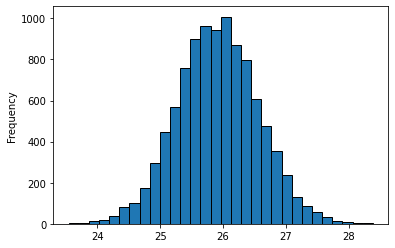

In [12]:
import matplotlib.pyplot as plt
means.plot.hist(bins = 30, edgecolor = 'k')
plt.show()

In general, given a point estimate from a sample of size n, we define its sampling
distribution as the distribution of the point estimate based on samples of size n
from its population. This definition is valid for point estimates of other population
parameters, such as the population median or population standard deviation, but we
will focus on the analysis of the sample mean.

The sampling distribution of an estimate plays an important role in understanding
the real meaning of propositions concerning point estimates. It is very useful to think
of a particular point estimate as being drawn from such a distribution.

#### __The traditional approach__

In real problems, we do not have access to the real population and so estimation
of the sampling distribution of the estimate from the empirical distribution of the
sample replications is not an option. But this problem can be solved by making use
of some theoretical results from traditional statistics.

I can be mathematically shown that given _n_ independent observations
$\{x_i\}_i = 1, 2, ...,n$ of a population with a standard deviation
$\sigma_x$, the standard deviation of the sample mean $\sigma_\bar{x}$,
or _standard error_, can be approximated by:

$$ SE = \frac{\sigma_x}{\sqrt{n}} $$

This formula uses the standard deviation of the population $\sigma_x$ , which is not known,
but it can be shown that if it is substituted by its empirical estimate $\hat{\sigma}_x $  , the estimation
is sufficiently good if n > 30 and the population distribution is not skewed. This
allows us to estimate the standard error of the sample mean even if we do not have
access to the population.
So, how can we give a measure of the variability of the sample mean? The answer
is simple: by giving the empirical standard error of the mean distribution.

In [13]:
import math
rows = np.random.choice(accs.index.values, 200)
sample = accs.loc[rows]
est_sigma_mean = sample.std() / math.sqrt(200)

In [14]:
print(
    'direct estimation of SE from one sample of 200 elements: ', est_sigma_mean.mean()
)

print(
    'estimation of the SE by simulating 1000 samples of 200 elements: ', np.array(means).std()
)

direct estimation of SE from one sample of 200 elements:  0.675709193790394
estimation of the SE by simulating 1000 samples of 200 elements:  0.6449065013626006


Unlike the case of the sample mean, there is no formula for the standard error of
other interesting sample estimates, such as the median.

Unlike the case of the sample mean, there is no formula for the standard error of
other interesting sample estimates, such as the median.

### __Computationally Intensive Approach__

Let us consider from now that our full dataset is a sample from a hypothetical
population (this is the most common situation when analyzing real data!).
A modern alternative to the traditional approach to statistical inference is the
_bootstrapping_ method. In the bootstrap, we draw _n_ observations with replacement
from the original data to create a bootstrap sample or resample. Then, we can calculate
the mean for this resample. By repeating this process a large number of times, we
can build a good approximation of the mean sampling distribution.

In [15]:
def mean_bootstrap(X, numberb):
    x = [0] * numberb
    for i in range(0, numberb):
        sample = [
            X[j] for j in np.random.randint(len(X), size = len(X))
        ]
        x[i] = np.mean(sample)
        print(
            f'bstrp: {i:5d} / {numberb:5d}| mean(sample): {np.mean(sample):4.4f}', end = '\r'
        )
    return x

m = mean_bootstrap(accidents, 10000)

In [16]:
m_series = pd.Series(m)

In [17]:
print('mean estimate: ', np.mean(m))

mean estimate:  25.910511780821917


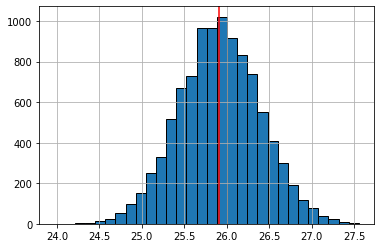

In [18]:
m_series.hist(bins = 30, edgecolor = 'k')
plt.axvline(m_series.mean(), color = 'r')
plt.show()

The basic idea of the bootstrapping method is that the observed sample contains
sufficient information about the underlying distribution. So, the information we can
extract from resampling the sample is a good approximation of what can be expected
from resampling the population.
The bootstrapping method can be applied to other simple estimates such as the
median or the variance and also to more complex operations such as estimates of
censored data.

### __Confidence Intervals__

A point estimate $\Theta$, such as the sample mean, provides a _single plausible value for a parameter_.
However, as we have seen, a point estimate is rarely perfect; usually there is some error in the estimate.
That is why we have suggested using the standard error as a measure of its variability.

Instead of that, a next logical step would be to provide a plausible range of values for the parameter.
A plausible range of values for the sample parameter is called a _confidence interval_.

We will base the definition of _confidence interval_ on two ideas:
1. Our point estimate is the most plausible value of the parameter, so it makes sense
   to build the confidence interval around the point estimate.
2. The _plausibility_ of a range of values can be defined from the sampling
   distribution of the estimate.
   
For the case of the mean, the Central Limit Theorem states that its sampling distribution is normal:

__Theorem 4.1__ _Given a population with a finite mean $\mu$ and a finite non-zero variance
$\sigma^2$, the sampling distribution of the mean approaches a normal distribution with a 
mean of $\mu$ and a variance of $\sigma^2 / n $ as n, the sample size, increases._

In this case, and in order to define an interval, we can make use of a well-known
result from probability that applies to normal distributions: roughly 95%
of the time our estimate will be within 1.96 standard errors of the true mean of the distribution.

If the interval spreads out 1.96 standard errors from a normally distributed point
estimate, intuitively we can say that we are roughly 95% confident that we have
captured the true parameter.

$$ CI = [\Theta - 1.96 \times SE, \Theta + 1.96 \times SE]$$

In [19]:
m = accidents.mean()
se = accidents.std() / math.sqrt(len(accidents))
ci = [m - se * 1.96, m + se * 1.96]

In [22]:
print('confidence intervak: ', ci)

confidence intervak:  [24.975156065800284, 26.8440220163915]


Suppose we want to consider confidence intervals where the confidence level is somewhat
higher than 95%: perhaps we would like a confidence level of 99%. To create a 99% confidence
interval, change 1.96 in the 95% confidence interval formula to be 2.58 (it can be shown
that 99% of the time a normal random varialbe will be within 2.58 standard deviations of the mean.

In general, if the point estimate follows the normal model with standard error $SE$, then a 
confidence interval for the population parameter is 

$$ \Theta \pm z \times SE $$

Where $z$ corresponds to the confindence level selected:
 - z = 1.65, confidence = 90%
 - z = 1.96, confidence = 95%
 - z = 2.58, confidence = 99%
 - z = 3.291, confidence = 99.9%

In [23]:
# compute a 95% confidence interval of the sample mean
# using bootstrapping
m = mean_bootstrap(accidents, 10000)
sample_mean = np.mean(m)
sample_se = np.std(m)

print('mean estimate: ', sample_mean)
print('SE of the estimate: ', sample_se)

ci = [np.percentile(m, 2.5), np.percentile(m, 97.5)]
print('confidence interval: ', ci)

mean estimate:  25.90982an(sample): 26.3945
SE of the estimate:  0.471426105600784
confidence interval:  [24.986301369863014, 26.84109589041096]


### What does 95% confident Mean?
The real meaning of “confidence” is not evident and it must be understood from the
point of view of the generating process.
Suppose we took many (infinite) samples from a population and built a 95%
confidence interval from each sample. Then about 95% of those intervals would
contain the actual parameter. If this simulation could be done with infinite different samples,
5% of those intervals would not contain the true mean.
So, when faced with a sample, the correct interpretation of a confidence interval
is as follows:

__In 95% of the cases, when I compute the 95% confidence interval from this sample,
the true mean of the population will fall within the invetrval defined by these bounds.__

__We cannot say either that out specific smaple contains the true parameter or
that the interval has a 95% chance of containing the true patameter.
That interpretration would not be correct under the assumptions of traditional
statistics.__

## __Hypothesis Testing__

Giving a measure of the variability of our estimates is one way of producing a
statistical proposition about the population, but not the only one. R.A. Fisher (1890–
1962) proposed an alternative, known as __hypothesis testing__, that is based on the
concept of __statistical significance__.

Let us suppose that a deeper analysis of traffic accidents in Barcelona results in a
difference between 2010 and 2013. Of course, the difference could be caused only
by chance, because of the variability of both estimates. But it could also be the case
that traffic conditions were very different in Barcelona during the two periods and,
because of that, data from the two periods can be considered as belonging to two
different populations. Then, the relevant question is: Are the observed effects real or
not?

Technically, the question is usually translated to: _Were the obserbed effectes statistically significant?_
The process of determining the statistical significance of an effect is called _hypothesis testing._

This process starts by simplifying the options into two competing hypotheses:
 + $H_0$: The mean number of daily traffic accidents is the same in 2010 and 2013
   (there is only one population, one true mean, and 2010 and 2013 are just different
   samples from the same population)
 + $H_A$: The mean number of daily traffic accidents in 2010 and 2013 is different
   (2010 and 2013 are two samples from two different populations.)

We call $H_0$ the _null hypothesis_ and it represents a _skepticap_ point of view:
the effect we have observed is due to chance (due to specific sample bias).
$H_A$ is the _alternative hypothesis_ and it represents tthe oter point of view:
the effect is real.

The general rule of frequentist hypothesis testing: we will not _discard_ $H_0$
(and hence we will not consider $H_A$) unless the observed effect
is _implausible_ under $H_0$.

In [32]:
# testing hypothesis using confidence intervals
# to measure the plausibility of hypothesis
accidents_2010 = pd.read_csv('input/ACCIDENTS_GU_BCN_2010.csv', encoding = 'latin-1')
accidents_2010 = accidents_2010.rename(columns = parse_col_names(accidents_2010.columns))

# create a new column which is the date
accidents_2010['date'] = accidents_2010['dia_de_mes'].apply(lambda x: str(x)) + \
                         '-' + accidents_2010['mes_de_any'].apply(lambda x: str(x))

dates_2010 = accidents_2010['date']
counts_2010 = accidents_2010['date'].value_counts()

print('2010: Mean', counts_2010.mean())

accidents_2013 = pd.read_csv('input/ACCIDENTS_GU_BCN_2013.csv', encoding = 'latin-1')
accidents_2013 = accidents_2013.rename(columns = parse_col_names(accidents_2013.columns))

# create a new column which is the date
accidents_2013['date'] = accidents_2013['dia_de_mes'].apply(lambda x: str(x)) + \
                         '-' + accidents_2013['mes_de_any'].apply(lambda x: str(x))

dates_2013 = accidents_2013['date']
counts_2013 = accidents_2013['date'].value_counts()

print('2013: Mean', counts_2013.mean())

2010: Mean 24.81095890410959
2013: Mean 25.90958904109589


This estimate suggests that in 2013 the mean rate of traffic accidents in Barcelona
was higher than it was in 2010. But is this effect statistically significant?

Based on our sample, the 95% confidence interval for the mean rate of traffic
accidents in Barcelona during 2013 can be calculated as follows:

In [42]:
n = len(counts_2013)
mean = counts_2013.mean()
s = counts_2013.std()
ci = [mean - s * 1.96 / np.sqrt(n), mean + s * 1.96 / np.sqrt(n)]

print('2010 accident rate estimate: ', counts_2010.mean())
print('2013 accident rate estimate: ', counts_2013.mean())
print('CI for 2013: ', ci)

2010 accident rate estimate:  24.81095890410959
2013 accident rate estimate:  25.90958904109589
CI for 2013:  [24.975156065800284, 26.8440220163915]


Because the 2010 accident rate estimate does not fall in the range of plausible
values of 2013, we say the alternative hypothesis cannot be discarded. That is, it
cannot be ruled out that in 2013 the mean rate of traffic accidents in Barcelona was
higher than in 2010.

### Interprteting CI Tests
Hypothesis testing is built around rejecting or failing to reject the null hypothesis.
That is, we do not reject $H_0$ unless we have strong evidence against it. But what
precisely does strong evidence mean? As a general rule of thumb, for those cases
where the null hypothesis is actually true, we do not want to incorrectly reject H 0
more than 5% of the time. This corresponds to a significance level of $\alpha =  0.05$. In
this case, the correct interpretation of our test is as follows:

If we use a 95% confidence interval to test a problem where the null hypothesis is true, we
will make an error whenever the point estimate is at least 1.96 standard errors away from the
population parameter. This happens about 5% of the time (2.5% in each tail).

### __Testing Hypothesis Using _p_-values__

A more advanced notion of statistical significance was developed by R.A. Fisher in
the 1920s when he was looking for a test to decide whether variation in crop yields
was due to some specific intervention or merely random factors beyond experimental
control.

Fisher first assumed that fertilizer caused no difference (_null hypothesis_) and then
calculated $P$, the probability that an observed yield in a fertilized field would occur
if fertilizer had no real effect. This probability is called the _p-value_.

The _p-value_ is the probability of observing data at least as favorable to the alter-
native hypothesis as our current dataset, if the null hypothesis is true. We typically
use a summary statistic of the data to help compute the p-value and evaluate the
hypotheses.

Usually, if $P$ is less than 0.05 (the chance of a fluke is less than 5%) the result is
declared __statistically significant__.
It must be pointed out that this choice is rather arbitrary and should not be taken
as a scientific truth.

The goal of classical hypothesis testing is to answer the question, _“Given a sample
and an apparent effect, what is the probability of seeing such an effect by chance?”_
Here is how we answer that question:
 + The first step is to quantidy the size of the apparent effect by choosing
   a test statistic. In our case, the apparent effect is a difference in 
   accident rates, so a natural choice for the test statistic is the __diferemce
   in means between the two periods__.
 + The second step si to deifne a _null hypothesis_, which is a model of the system
   based on the assumption that the apparent effect is not real. In our case,
   the null hypothesis is that there is no difference between the two periods.
 + The third step is to compute a _p-value_, which is the probability of seeing
   the apparent effect if the null hypothesis is true. In our case, we would
   compute the difference in means, then compute the probability of seeing a 
   difference as big, or bigger, under the null hypothesis.
 + The last step is to _interpret the result. If the _p_-value is low, the effect
   is said to be _statistically significant_, which means that it is unlikely to 
   have occurred by chance. In this case we infer that the effect is more likely
   to appear in the larger population.

In [43]:
# computing test statistic
m = len(counts_2010)
n = len(counts_2013)
p = (counts_2013.mean() - counts_2010.mean())

print('m: ', m, 'n: ', n)
print('mean difference: ', p)

m:  365 n:  365
mean difference:  1.0986301369863014


In [47]:
# approx the p-value
# pooling distributions
X = counts_2010
Y = counts_2013

pool = np.concatenate([X, Y])
np.random.shuffle(pool)

# sample generation
import random
N = 10000; diff = [0] * N
for i in range(N):
    p1 = [random.choice(pool) for __ in range(n)]
    p2 = [random.choice(pool) for __ in range(n)]
    diff[i] = (np.mean(p1) - np.mean(p2))

# counting differences larger than the observed one
diff2 = np.array(diff)
w1 = np.where(diff2 > p)[0]

p-value simulation:  0.0457 (4.57%)
Difference: 1.0986301369863014


In [49]:
print('p-value simulation: ', len(w1) / float(N), end = ' ')
print(f'({len ( w1 ) / float ( N ) *100:.2f}%)')
print(f'Difference: {p:.3f}')

if (len(w1) / float(N)) < 0.05:
    print('The effect is likely')
else:
    print('The effect is not likely')

p-value simulation:  0.0457 (4.57%)
Difference: 1.099
The effect is likely


### Interpreting P-Values
A _p_-value is the probability of an observed (or more extreme) result arising only
from chance.
If P is less than 0.05, there are two possible conclusions: there is a real effect or
the result is an improbable fluke. __Fisher’s method offers no way of knowing which is
the case.__

We must not confuse the odds of getting a result (if a hypothesis is true) with
the odds of favoritng the hypothesis if you observe that result. If $P$ is less than 0.05,
we cannot say that this means that it is 95% certain that the observed effect is real
and could not have arisen by chance. Given an observation $E$ and a hypothesis $H$,
$P(E|H)$ and $P(H|E)$ are not the same.

Another common error equates _statistical significance to practical importance/relevance_.
When working with large datasets, we can detect statistical significance
for small effects that are meaningless in practical terms.

We have defined the effect as a _difference in mean as large or larger than $\delta$,
considering the sign_. A test like this is called _one sided_.

If the relevant question is whether _accident rates are different_, then it makes sense
to test the absolute difference in means. This kind of test is called two sided because
it counts both sides of the distribution of differences.

## Direct Approach
The formula for the standard error of the absolute difference in two means
is similar to the formula for other standard errors. Recall that the standard error
of a single mean can be approximated by:
    
$$ SE_{\bar{x}_1} = \frac{\sigma_1}{\sqrt{n_1}} $$

The standard error of the difference of two sample means can be constructed from the standard
erros of the separate means:

$$ SE_{\bar{x}_1 - \bar{x}_2} = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} $$

This would allow us to define a direct test with the 95% confidence interval.

### Is the Effect $E$ Real?

We do not yet have an answer for this question! We have defined a null hypothesis
$H_0$ (the effect is not real) and we have computed the probability of the observed
effect under the null hypothesis, which is $P(E|H_0)$, where $E$ is an effect as big as
or bigger than the apparent effect and a p-value .
We have stated that from the frequentist point of view, we cannot consider H A
unless $P(E|H_0)$ is less than an arbitrary value. But the real answer to this question
must be based on comparing $P(H_0|E)$ to $P(H_A|E)$, not on $P(E|H_0)$! One possi-
ble solution to these problems is to use __Bayesian reasoning__; an alternative to the
frequentist approach.
No matter how many data you have, you will still depend on intuition to decide
how to interpret, explain, and use that data. Data cannot speak by themselves. Data
scientists are interpreters, offering one interpretation of what the useful narrative
story derived from the data is, if there is one at all.